In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#database connection settings
import psycopg2

db_name = "traviato_development"
db_host = "localhost"
db_port = "5432"
db_user = "lievgarcia"
db_pwd = "traviato81"

conn = psycopg2.connect(database=db_name, user=db_user, password=db_pwd, host=db_host, port=db_port)

In [34]:
import pandas as pd

cursor = conn.cursor()  
query = "SELECT composer, work, SUM(CASE WHEN l.source_id IN (6, 11) THEN CAST(l.additional_text AS INT) ELSE 1 END) " + \
        "FROM listings l " + \
        "group by composer, work " + \
        "order by 3 desc "
        
cursor.execute(query)

map_df = pd.DataFrame(cursor.fetchall(), columns=['composer', 'work', 'count'])
map_df['cumsum'] = map_df['count'].cumsum()
map_df['cumsum_k'] = map_df.apply(lambda row: row['cumsum']/1000, axis=1)

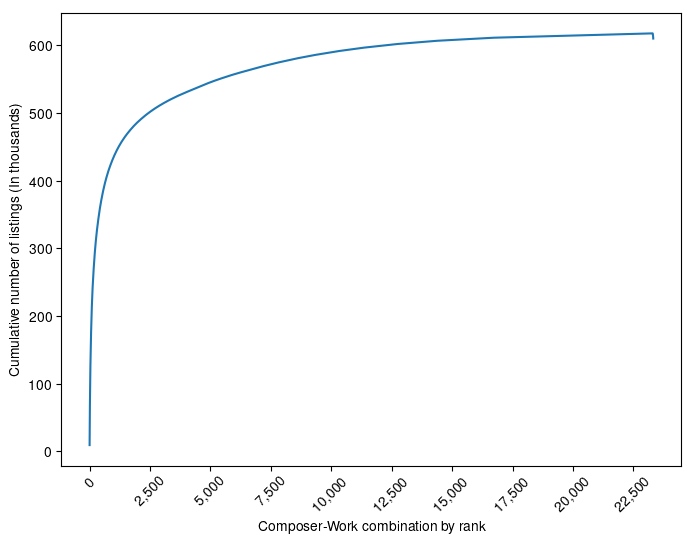

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# from matplotlib import rcParams

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


fig=plt.figure(figsize=(8, 6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(list(map_df['cumsum_k']))
plt.ylabel('Cumulative number of listings (In thousands)')
plt.xlabel('Composer-Work combination by rank')
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2500))
plt.xticks(rotation=45)
plt.show()

In [48]:
sum(list(map_df['count'])[0:2500])

501751